In [2]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt

# Save Image

In [37]:
with h5py.File('../home/Data/train/image/brain_acc4_1.h5', 'r') as file:
    print("Keys in the file:", list(file.keys()))
    keys = list(file.keys())

Keys in the file: ['image_grappa', 'image_input', 'image_label']


In [44]:
n_data = [118, 118, 120]
acc_factor = [4, 5, 8]

for i, n in enumerate(n_data):
    for j in range(n):
        with h5py.File(f'../home/Data/train/image/brain_acc{acc_factor[i]}_{j+1}.h5', 'r') as file:
            keys = list(file.keys())
            # List all groups and datasets in the file
            for key in keys:
                data = file[key][:]
                for k in range(len(data)):
                    image = data[k]
                    image -= image.min()
                    image /= image.max()
                    image *= 255  # Scale to [0, 255]
                    
                    # Convert to uint8 (optional, for image file compatibility)
                    image = image.astype(np.uint8)

                    # Save the image
                    plt.imsave(f'image/brain_acc{acc_factor[i]}_{j+1}_{key}_{k}.png', image, cmap='gray')

In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

n_train_data = [118, 118, 120]
n_data = [17, 17, 17]
acc_factor = [4, 5, 8]

for i, n in enumerate(n_data):
    for j in range(n):
        with h5py.File(f'../home/Data/val/image/brain_acc{acc_factor[i]}_{j+1+n_train_data[i]}.h5', 'r') as file:
            keys = list(file.keys())
            # List all groups and datasets in the file
            for key in keys:
                data = file[key][:]
                for k in range(len(data)):
                    image = data[k]
                    image -= image.min()
                    image /= image.max()
                    image *= 255  # Scale to [0, 255]
                    
                    # Convert to uint8 (optional, for image file compatibility)
                    image = image.astype(np.uint8)

                    # Save the image
                    plt.imsave(f'image/val/brain_acc{acc_factor[i]}_{j+1+n_train_data[i]}_{key}_{k}.png', image, cmap='gray')

In [5]:
for i in range(58):
    with h5py.File(f'../home/Data/leaderboard/acc5/image/brain_test{i+1}.h5', 'r') as file:
        keys = list(file.keys())
        # List all groups and datasets in the file
        for key in keys:
            data = file[key][:]
            for k in range(len(data)):
                image = data[k]
                image -= image.min()
                image /= image.max()
                image *= 255  # Scale to [0, 255]
                
                # Convert to uint8 (optional, for image file compatibility)
                image = image.astype(np.uint8)

                # Save the image
                plt.imsave(f'image/leaderboard/brain_acc5_test{i+1}_{key}_{k}.png', image, cmap='gray')
    with h5py.File(f'../home/Data/leaderboard/acc9/image/brain_test{i+1}.h5', 'r') as file:
        keys = list(file.keys())
        # List all groups and datasets in the file
        for key in keys:
            data = file[key][:]
            for k in range(len(data)):
                image = data[k]
                image -= image.min()
                image /= image.max()
                image *= 255  # Scale to [0, 255]
                
                # Convert to uint8 (optional, for image file compatibility)
                image = image.astype(np.uint8)

                # Save the image
                plt.imsave(f'image/leaderboard/brain_acc9_test{i+1}_{key}_{k}.png', image, cmap='gray')
    

# k-space Masks

## k-space Visualization

['kspace', 'mask']
<HDF5 dataset "mask": shape (396,), type "<f4">


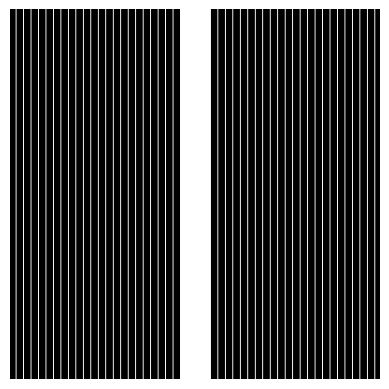

In [29]:
file = h5py.File(f'../home/Data/train/kspace/brain_acc8_1.h5', 'r')
keys = list(file.keys())
print(keys)
data = file['mask']
print(data)
mask = np.array([list(data) for i in range(len(data))])
plt.imshow(mask, cmap='gray')
plt.axis('off')
file.close()

In [63]:
# Train Data
n_data = [118, 118, 120]
acc_factor = [4, 5, 8]

for i, n in enumerate(n_data):
    data = []
    for j in range(n):
        with h5py.File(f'../home/Data/train/kspace/brain_acc{acc_factor[i]}_{j+1}.h5', 'r') as file:
            data.append(len(file['mask'][:]))
    print(np.unique(np.array(data), return_counts=True))
    # plt.imshow(data)

(array([392, 396]), array([  6, 112]))
(array([392, 396]), array([  5, 113]))
(array([392, 396]), array([  6, 114]))


In [81]:
# Val Data
n_train_data = [118, 118, 120]
acc_factor = [4, 5, 8]

for i, n in enumerate(n_data):
    data = []
    for j in range(n):
        with h5py.File(f'../home/Data/val/kspace/brain_acc{acc_factor[i]}_{j+1+n_train_data[i]}.h5', 'r') as file:
            data.append(len(file['mask'][:]))
    print(np.unique(np.array(data), return_counts=True))

(array([396]), array([17]))
(array([392, 396]), array([ 1, 16]))
(array([392, 396]), array([ 2, 15]))


In [85]:
# Leaderboard Data
n_data = [58, 58]
acc_factor = [5, 9]

for i, n in enumerate(n_data):
    data = []
    for j in range(n):
        with h5py.File(f'../home/Data/leaderboard/acc{acc_factor[i]}/kspace/brain_test{j+1}.h5', 'r') as file:
            data.append(len(file['mask'][:]))
    print(np.unique(np.array(data), return_counts=True))

(array([392, 396]), array([12, 46]))
(array([392, 396]), array([12, 46]))


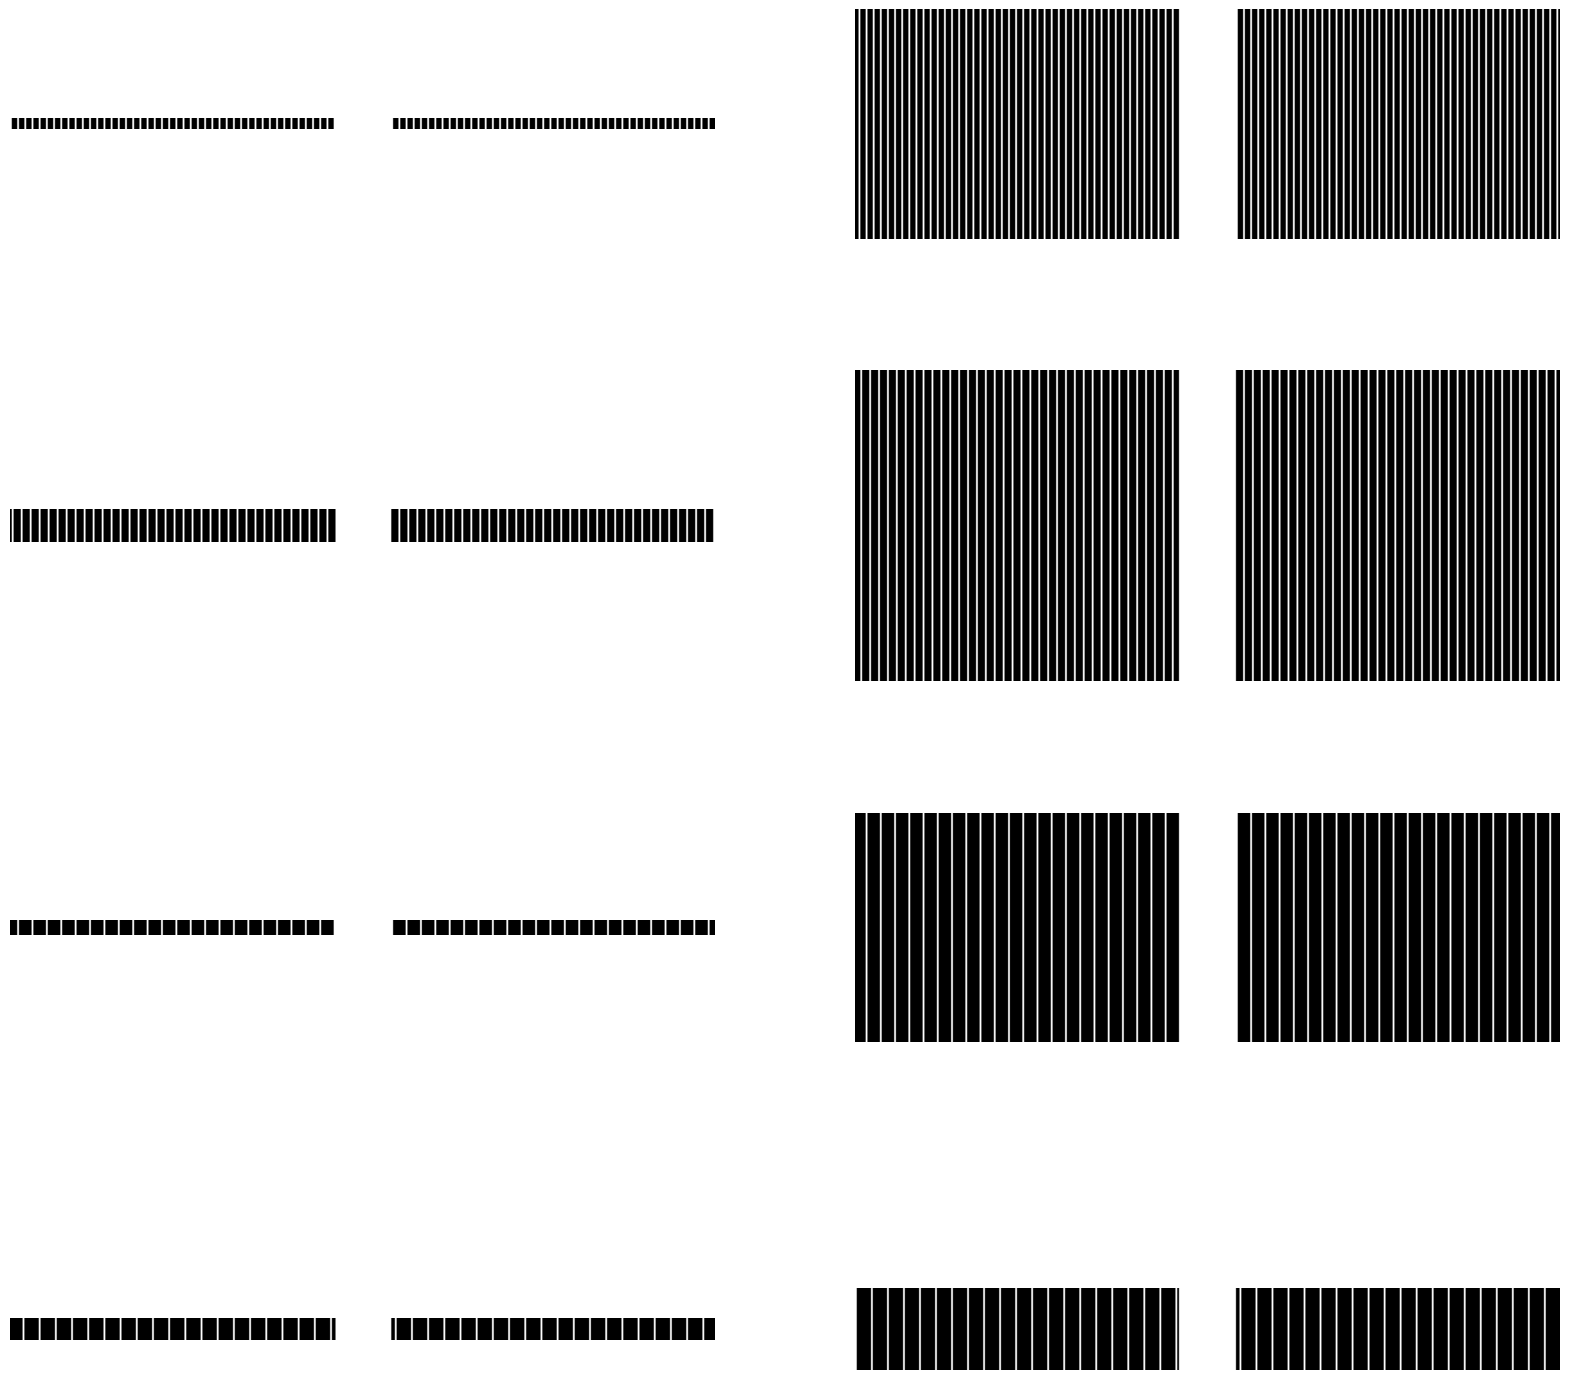

In [2]:
n_data = [118, 118, 120]
n_data_val = [17, 17, 17]
acc_factor = [4, 5, 8]

mask_392 = [np.array([]) for i in range(4)]
mask_396 = [np.array([]) for i in range(4)]

for i, n in enumerate(n_data):
    for j in range(n):
        with h5py.File(f'../home/Data/train/kspace/brain_acc{acc_factor[i]}_{j+1}.h5', 'r') as file:
            mask = file['mask'][:]
            if len(mask) == 392:
                mask_392[i] = np.append(mask_392[i], mask)
            if len(mask) == 396:
                mask_396[i] = np.append(mask_396[i], mask)
for i, n in enumerate(n_data_val):
    for j in range(n):
        with h5py.File(f'../home/Data/val/kspace/brain_acc{acc_factor[i]}_{j+1+n_data[i]}.h5', 'r') as file:
            mask = file['mask'][:]
            if len(mask) == 392:
                mask_392[i] = np.append(mask_392[i], mask)
            if len(mask) == 396:
                mask_396[i] = np.append(mask_396[i], mask)

for i in range(58):
    with h5py.File(f'../home/Data/leaderboard/acc5/kspace/brain_test{i+1}.h5', 'r') as file:
        mask = file['mask'][:]
        if len(mask) == 392:
            mask_392[1] = np.append(mask_392[1], mask)
        if len(mask) == 396:
            mask_396[1] = np.append(mask_396[1], mask)
for i in range(58):
    with h5py.File(f'../home/Data/leaderboard/acc9/kspace/brain_test{i+1}.h5', 'r') as file:
        mask = file['mask'][:]
        if len(mask) == 392:
            mask_392[3] = np.append(mask_392[3], mask)
        if len(mask) == 396:
            mask_396[3] = np.append(mask_396[3], mask)

fig, ax = plt.subplots(4, 2, figsize = (20, 20))
for i in range(4):
    ax[i, 0].imshow(mask_392[i].reshape(-1, 392), cmap = 'gray')
    ax[i, 0].axis('off')
    ax[i, 1].imshow(mask_396[i].reshape(-1, 396), cmap = 'gray')
    ax[i, 1].axis('off')
    ax[i, 0].imshow(mask_392[i].reshape(-1, 392), cmap = 'gray')
    ax[i, 0].axis('off')
    ax[i, 1].imshow(mask_396[i].reshape(-1, 396), cmap = 'gray')
    ax[i, 1].axis('off')

In [12]:
mask_value_392 = [mask_392[i].reshape(-1,392)[0] for i in range(4)]
mask_value_396 = [mask_396[i].reshape(-1,396)[0] for i in range(4)]
acc_list = [4, 5, 8, 9]
print("\t392\t396")
for i in range(4):
    print(f"acc{acc_list[i]}\t{int(mask_value_392[i].sum())}\t{int(mask_value_396[i].sum())}")

	392	396
acc4	122	123
acc5	103	104
acc8	77	77
acc9	71	73


In [24]:
df = pd.DataFrame(mask_value_392).astype(int)
df[:]

,0,1,2,3,4,5,6,7,8,9,...,382,383,384,385,386,387,388,389,390,391
0,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
df.iloc[:,]

0    0
1    1
2    0
3    0
Name: 1, dtype: int64

In [41]:
k = 18
for i in range(4):
    print(mask_value_392[i][196-k:196+k].astype(int))

[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [44]:
k = 18
for i in range(4):
    print(mask_value_396[i][198-k:198+k].astype(int))

[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


## k-space Mask Creation

In [65]:
mask_392_m = []
mask_396_m = []
acc_list = [4, 5, 8, 9]

for acc in acc_list:
    a = np.array([int((i-196)%acc == 0) for i in range(392)])
    a[181:212] = 1
    mask_392_m.append(a)

    a = np.array([int((i-198)%acc == 0) for i in range(396)])
    a[182:214] = 1
    mask_396_m.append(a)

k = 18
for i in range(4):
    print(mask_value_392[i][-2*k:].astype(int))
    print(mask_392_m[i][-2*k:].astype(int))
    print()
for i in range(4):
    print(mask_value_396[i][-2*k:].astype(int))
    print(mask_396_m[i][-2*k:].astype(int))
    print()

[1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
[1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]

[1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
[1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]

[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]

[0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0]
[0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0]

[0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
[0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0

In [72]:
for i in range(len(mask_value_392)):
    print(np.abs(mask_value_392[i]-mask_392_m[i]).sum())
    print(np.abs(mask_value_396[i]-mask_396_m[i]).sum())

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
mask_392_m = []
mask_396_m = []
acc_list = list(range(1, 11))

for acc in acc_list:
    a = np.array([int((i-196)%acc == 0) for i in range(392)])
    a[181:212] = 1
    mask_392_m.append(a)

    a = np.array([int((i-198)%acc == 0) for i in range(396)])
    a[182:214] = 1
    mask_396_m.append(a)

In [6]:
file = h5py.File(f'../home/Data/train/kspace/brain_acc8_1.h5', 'r')
keys = list(file.keys())
print(keys)
data = file['kspace']
print(type(data))
print(data.shape[-1])
file.close()

['kspace', 'mask']
<class 'h5py._hl.dataset.Dataset'>
396


# Validation by Acc Factor

In [1]:
from pathlib import Path
import argparse
import torch

import pathlib
import platform
if platform.system() == 'Linux':
  pathlib.WindowsPath = pathlib.PosixPath

from utils.data.load_data import create_data_loaders
from utils.learning.test_part import validate_acc
from utils.model.varnet import VarNet
import fastmri

def parse():
    parser = argparse.ArgumentParser(description='Train Varnet on FastMRI challenge Images',
                                    formatter_class=argparse.ArgumentDefaultsHelpFormatter)
    parser.add_argument('-g', '--GPU-NUM', type=int, default=0, help='GPU number to allocate')
    parser.add_argument('-b', '--batch-size', type=int, default=1, help='Batch size')
    parser.add_argument('-e', '--num-epochs', type=int, default=10, help='Number of epochs')
    parser.add_argument('-l', '--lr', type=float, default=1e-3, help='Learning rate')
    parser.add_argument('-r', '--report-interval', type=int, default=100, help='Report interval')
    parser.add_argument('-n', '--net-name', type=Path, default='test_Varnet_2', help='Name of network')
    parser.add_argument('-t', '--data-path-train', type=Path, default='../../home/Data/train/', help='Directory of train data')
    parser.add_argument('-v', '--data-path-val', type=Path, default='../../home/Data/val/', help='Directory of validation data')
    
    parser.add_argument('--cascade', type=int, default=6, help='Number of cascades | Should be less than 12') ## important hyperparameter, 1 in original
    parser.add_argument('--chans', type=int, default=12, help='Number of channels for cascade U-Net | 18 in original varnet') ## important hyperparameter, 9 in original
    parser.add_argument('--sens_chans', type=int, default=5, help='Number of channels for sensitivity map U-Net | 8 in original varnet') ## important hyperparameter, 4 in original
    parser.add_argument('--input-key', type=str, default='kspace', help='Name of input key')
    parser.add_argument('--target-key', type=str, default='image_label', help='Name of target key')
    parser.add_argument('--max-key', type=str, default='max', help='Name of max key in attributes')
    parser.add_argument('--seed', type=int, default=430, help='Fix random seed')

    args = parser.parse_args()
    return args

args = parse()

args.exp_dir = '../result' / args.net_name / 'checkpoints'
args.val_dir = '../result' / args.net_name / 'reconstructions_val'
args.main_dir = '../result' / args.net_name / __file__
args.val_loss_dir = '../result' / args.net_name

device = torch.device(f'cuda:{args.GPU_NUM}' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)
print ('Current cuda device ', torch.cuda.current_device())

model = VarNet(num_cascades=args.cascade, 
                chans=args.chans, 
                sens_chans=args.sens_chans)
model.to(device=device)

checkpoint = torch.load(args.exp_dir / 'best_model.pt', map_location='cpu')
print(checkpoint['epoch'], checkpoint['best_val_loss'].item())
model.load_state_dict(checkpoint['model'])

val_loader = create_data_loaders(data_path = args.data_path_val, args = args)
acc_list = [4, 5, 8]
loss_list, time_list = validate_acc(model, val_loader, acc_list)

ModuleNotFoundError: No module named 'fastmri'